# Apply vs. Vectorization Results

In [1]:
# Install the required dependencies using pip __in the current Jupyter kernel__.
#
# See: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn

In [2]:
%matplotlib inline

from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# These data are from random invocations of the instrumented driver function
# with time stats provided by ``LineProfiler``.  The values are in units of
# clock ticks.
speed_up_stats = pd.DataFrame({
    'apply()': [669420, 630032, 611248, 641719, 665343, 647548, 623182, 613653, 599140, 661378],
    'vectorized': [12440, 34681, 15372, 16550, 11978, 14070, 12201, 12315, 13769, 11792]
})

# The speed-up multiplier (i.e. vectorized is n-times faster than apply()).
speed_up_stats['speed up'] = speed_up_stats['apply()'] / speed_up_stats['vectorized']

In [4]:
# LineProfiler gives a timer unit of 1e-6 s/tick, which is 1e-3 ms/tick.
ms_per_tick = 1e-3

# Convert clock cycles to seconds.
speed_up_stats['apply()'] = speed_up_stats['apply()'] * ms_per_tick
speed_up_stats['vectorized'] = speed_up_stats['vectorized'] * ms_per_tick

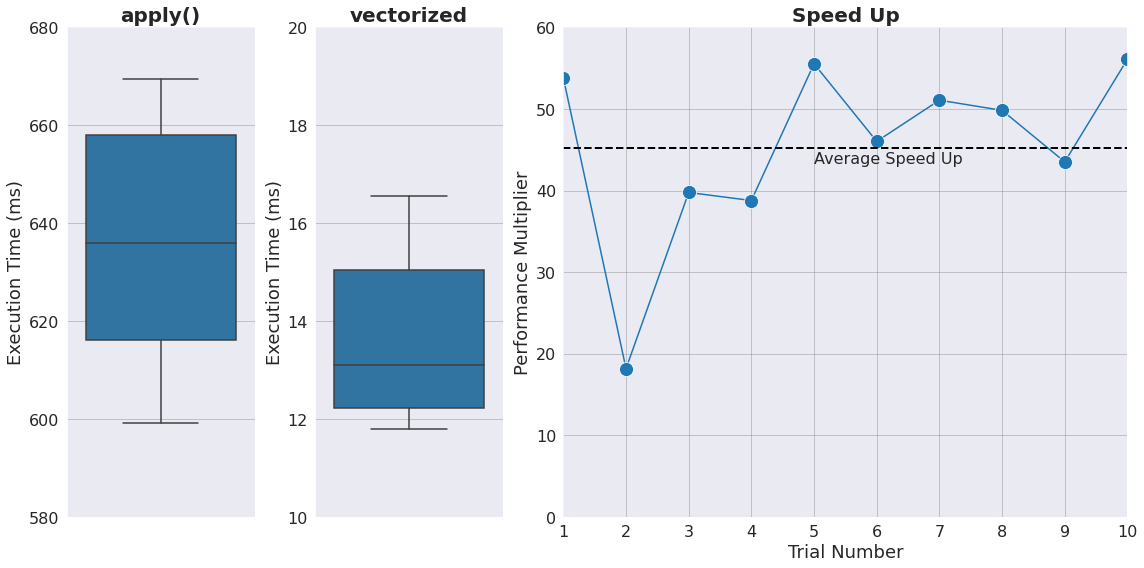

In [5]:
# We'll plot the data in a 1x3 subplot:
#   1. A box plot showing the quartiles of the apply() method,
#   2. A box plot showing the quartiles of the vectorized method, and
#   3. The plot of performance speed up for each of the trials.

sns.set_style('dark')

fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1, 3]})

# Plot 1 - Box plot of the apply() method.
ax1.set_title('apply()', fontweight='bold', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('Execution Time (ms)', fontsize=18)
ax1.set_ylim(bottom=580, top=680)
ax1.set_axisbelow(True)
ax1.xaxis.set_visible(False)
ax1.yaxis.grid(True, alpha=0.5, color='gray')
ax1.tick_params(axis='both', labelsize=16)

sns.boxplot(data=speed_up_stats['apply()'], ax=ax1)

# Plot 2 - Box plot of the vectorized method.
ax2.set_title('vectorized', fontweight='bold', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('Execution Time (ms)', fontsize=18)
ax2.set_ylim(bottom=10, top=20)
ax2.set_axisbelow(True)
ax2.xaxis.set_visible(False)
ax2.yaxis.grid(True, alpha=0.5, color='gray')
ax2.tick_params(axis='both', labelsize=16)

sns.boxplot(data=speed_up_stats['vectorized'],
            showfliers=False,
            ax=ax2)

# Plot 3 - Line plot showing performance multiplier for each trial.
ax3.set_title('Speed Up', fontweight='bold', fontsize=20)
ax3.set_xlabel('Trial Number', fontsize=18)
ax3.set_ylabel('Performance Multiplier', fontsize=18)
ax3.set_xlim(left=1, right=10)
ax3.set_ylim(bottom=0, top=60)
ax3.xaxis.grid(True, alpha=0.5, color='gray')
ax3.yaxis.grid(True, alpha=0.5, color='gray')
ax3.tick_params(axis='both', labelsize=16)

sns.lineplot(data=speed_up_stats,
             x=speed_up_stats.index + 1,
             y='speed up',
             marker="o",
             markersize=14,
             ax=ax3)

average_speed_up = speed_up_stats['speed up'].mean()
ax3.axhline(y=average_speed_up,
            color='black',
            linestyle='--',
            linewidth=2)
ax3.annotate('Average Speed Up',
             xy=(5, average_speed_up),
             xytext=(0, -16),  # -16 points vertical offset.
             textcoords='offset points',
             horizontalalignment='left',
             verticalalignment='baseline',
             fontsize=16)

fig1.tight_layout()

plt.show()

In [6]:
# The matplotlib ``print_svg`` backend allows us to create a metadata
# dictionary to save with the image.
svg_metadata = {
    'Creator': 'Gary Hammock',
    'Rights': 'CC BY-SA 4.0',
    'Date': datetime.now().isoformat(),
    'Title': 'Performance Gain by Vectorization over apply()',
    'Description': (
        'This plot shows the order-of-magnitude increase in performance of using '
        'NumPy\'s built-in vectorization capability over using Pandas.DataSeries.apply().'
    ),
    'Keywords': ['vectorization', 'apply'],
    'Language': 'en-US'
}

# Save the rendered plot for posterity.
fig1.savefig('apply_vs_vectorization.svg', format='svg', metadata=svg_metadata)